In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import KFold
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bigml_59c28831336c6604c800002a.csv']


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('../input/bigml_59c28831336c6604c800002a.csv')

data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
print("data has {} rows".format(data.shape[0]))
print("data has {} columns".format(data.shape[1]))

data has 3333 rows
data has 21 columns


Churn Percentage is 14.491449144914492


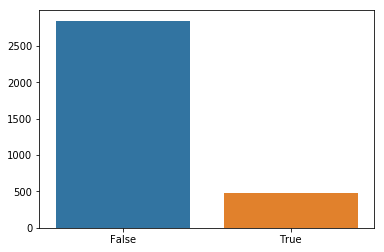

In [5]:
y = data["churn"].value_counts()
sns.barplot(y.index, y.values)
print("Churn Percentage is {}".format(data["churn"].sum()*100/data["churn"].shape[0]))

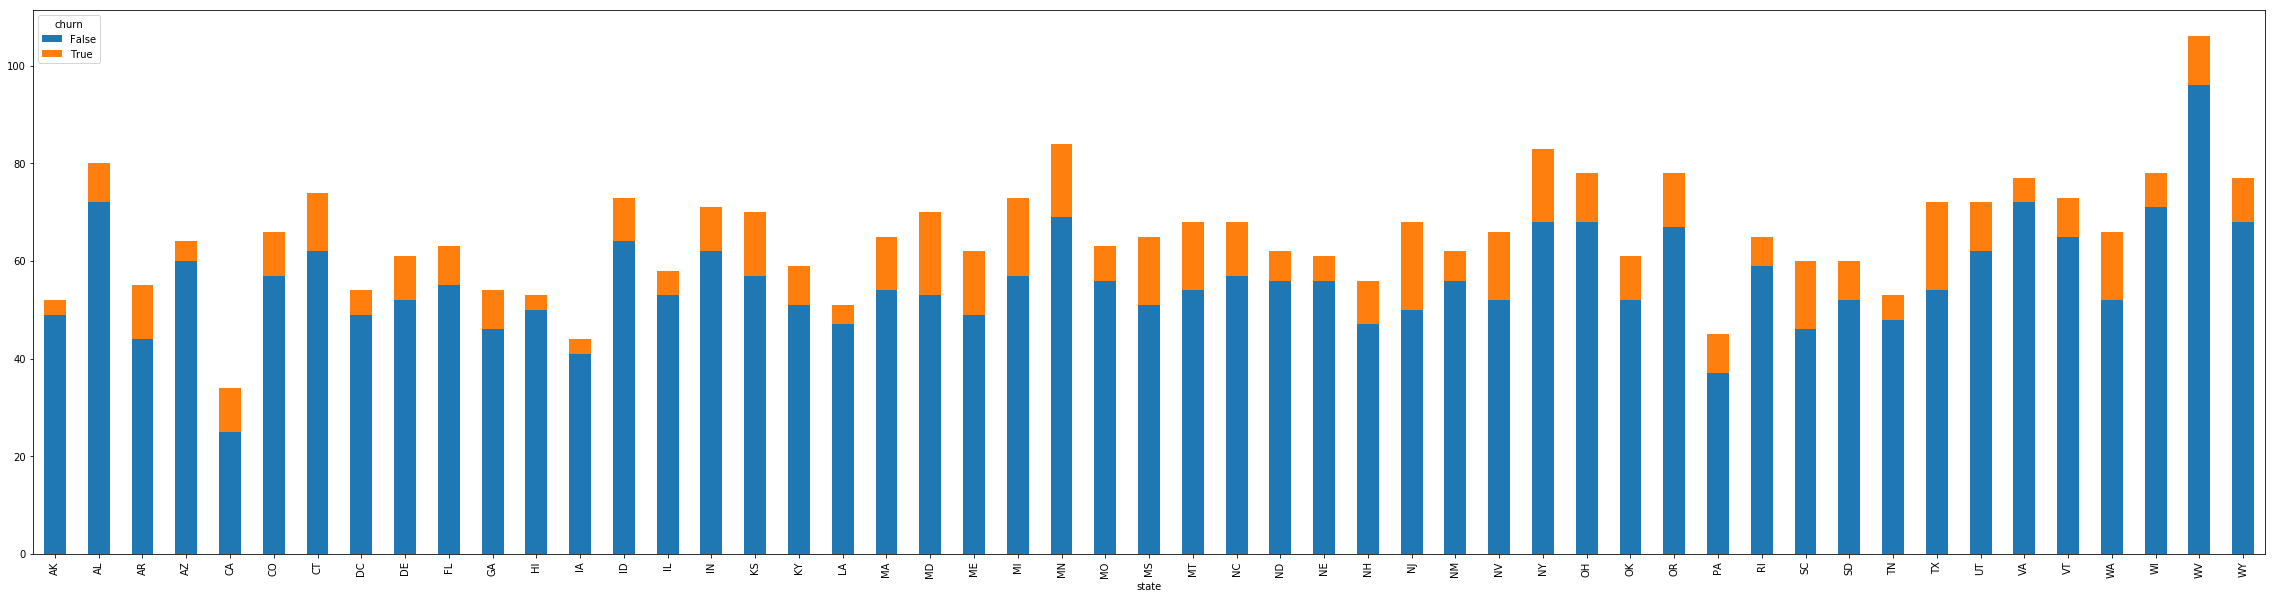

In [6]:
data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(40,10))

In [7]:
# converting the catagorical columns into integer values
label_encoder = preprocessing.LabelEncoder()

data['state'] = label_encoder.fit_transform(data['state'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])
data['churn'] = label_encoder.fit_transform(data['churn'])

In [8]:
# one hot encoding of catagorical variables
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

catagories = ['state', 'area code']
catagorical_data = data.loc[:,catagories]

enc.fit(catagorical_data)
one_hot = pd.DataFrame(enc.transform(catagorical_data).toarray())
one_hot.iloc[-3:]

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:351: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# combining it with the data

data_f = pd.concat([data, one_hot], axis = 1)
data_f.drop(["phone number","state","area code","churn"], axis = 1, inplace = True)

In [10]:
# features
features = data_f.columns
# transforming the dataframe into matrix
X = data_f.as_matrix().astype(np.float)
X.shape
Y = data['churn']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [11]:
print(X.shape)
Y.shape

(3333, 71)


(3333,)

In [12]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

def model_runner(X, Y, model, n_fold, **kwargs):
    # we shall use stratified sampling because the data is not balanced
    k_fold_cv = cross_validation.StratifiedKFold(Y, n_folds = n_fold,shuffle = True)
    Y_predict = Y.copy()
    
    for i, j in k_fold_cv:
        X_train, X_test = X[i], X[j]
        Y_train = Y[i]
        mdl = model(**kwargs)
        mdl.fit(X_train, Y_train)
        Y_predict[j] = mdl.predict(X_test)
    return Y_predict

def accuracy_printer (name, Y, Y_predict):
    print(str(name) + ' :' + '{}'.format(metrics.accuracy_score(Y, Y_predict)))
    
def confusion_matrix (name, Y, Y_predict):
    con_mtx = metrics.confusion_matrix(Y, Y_predict)
    sns.heatmap(con_mtx, annot = True, fmt = '')
    title = name
    plt.title(title)
    return con_mtx

Logistic Regression :0.858985898589859


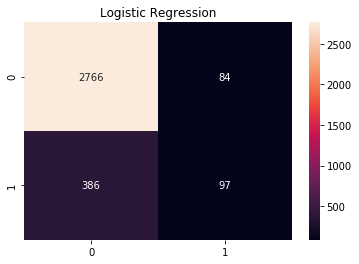

In [13]:
# Logistic Regression
 
Y_lr = model_runner(X, Y, linear_model.LogisticRegression, 10)
accuracy_printer('Logistic Regression', Y, Y_lr)
cm_lr = confusion_matrix('Logistic Regression', Y, Y_lr)

K Nearest Neighbor :0.8775877587758776


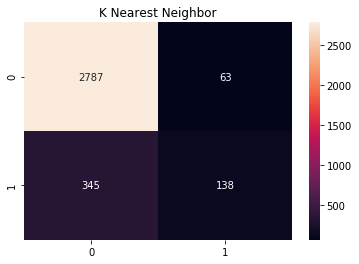

In [14]:
# K Nearest Neighbor
 
Y_kn = model_runner(X, Y, neighbors.KNeighborsClassifier, 10)
accuracy_printer('K Nearest Neighbor', Y, Y_kn)
cm_kn = confusion_matrix('K Nearest Neighbor', Y, Y_kn)

Decision Tree :0.9171917191719172


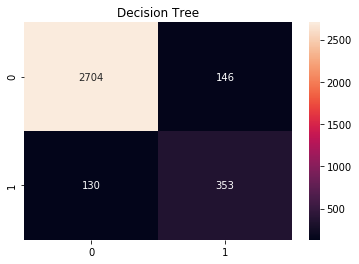

In [15]:
# Decision Tree
 
Y_dt = model_runner(X, Y, tree.DecisionTreeClassifier, 10)
accuracy_printer('Decision Tree', Y, Y_dt)
cm_dt = confusion_matrix('Decision Tree', Y, Y_dt)

Support vector machine :0.8550855085508551


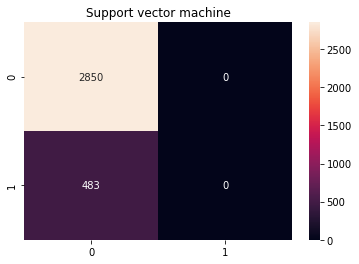

In [16]:
# Support vector machine
 
Y_svm = model_runner(X, Y, svm.SVC, 10)
accuracy_printer('Support vector machine', Y, Y_svm)
cm_svm = confusion_matrix('Support vector machine', Y, Y_svm)

Random Forest :0.9228922892289229


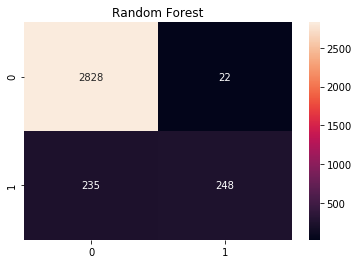

In [17]:
# Random Forest
 
Y_rf = model_runner(X, Y, ensemble.RandomForestClassifier, 10)
accuracy_printer('Random Forest', Y, Y_rf)
cm_rf = confusion_matrix('Random Forest', Y, Y_rf)

Gradient Boosting :0.9510951095109511


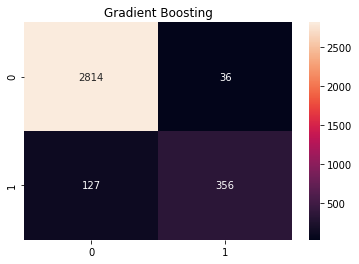

In [18]:
# Gradient Boosting
 
Y_gb = model_runner(X, Y, ensemble.GradientBoostingClassifier, 10)
accuracy_printer('Gradient Boosting', Y, Y_gb)
cm_gb = confusion_matrix('Gradient Boosting', Y, Y_gb)

Bagging :0.9471947194719472


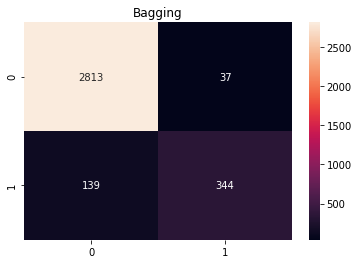

In [19]:
# Bagging
 
Y_bg = model_runner(X, Y, ensemble.BaggingClassifier, 10)
accuracy_printer('Bagging', Y, Y_bg)
cm_bg = confusion_matrix('Bagging', Y, Y_bg)

In [20]:
# Each subscription cost's $100 and for a future churned customer we are allocating $20 off to prevent churn
# if a churned customer is correctly predicted we will save 100(subscription) - 20 (offer) = $80
# if we predict non churn customer as a churned customer we would loose = $20
# if a non churn customer is correctly predicted we save nothing 
# if we predict churn customer as a non churn customer we would loose = $100

def cost_cal (con_mtx):
    savings = con_mtx[0,1]*(-20) + con_mtx[1,0]*(-100) + con_mtx[1,1]*(80)
    with_out_ml = (con_mtx[1,0] + con_mtx[1,1])*(-100)
    total_savings = savings - with_out_ml
    return total_savings

In [21]:
print('Total profit by using Logistic Regression :'+ str(cost_cal(con_mtx = cm_lr)))
print('Total profit by using Gradient Boosting :'+ str(cost_cal(con_mtx = cm_gb)))
print('Total profit by using Support vector machine :'+ str(cost_cal(con_mtx = cm_svm)))
print('Total profit by using Random Forest :'+ str(cost_cal(con_mtx = cm_rf)))
print('Total profit by using K Nearest Neighbor :'+ str(cost_cal(con_mtx = cm_kn)))
print('Total profit by using Decision Tree :'+ str(cost_cal(con_mtx = cm_dt)))
print('Total profit by using Bagging :'+ str(cost_cal(con_mtx = cm_bg)))

Total profit by using Logistic Regression :15780
Total profit by using Gradient Boosting :63360
Total profit by using Support vector machine :0
Total profit by using Random Forest :44200
Total profit by using K Nearest Neighbor :23580
Total profit by using Decision Tree :60620
Total profit by using Bagging :61180


In [22]:
# Our main aim is to predict all the churn customers and to maximize the profits. 
# even tho we are saving 63760 using Gradient Boosting but, we are misclassifying 125 customers as non churn customers
# This can be taken care by adjusting the threshold for classification.


def model_runner_thr(X, Y, model, n_fold, name, **kwargs):
    # we shall use stratified sampling because the data is not balanced
    k_fold_cv = cross_validation.StratifiedKFold(Y, n_folds = n_fold,shuffle = True)
    Y_predict = Y.copy()
    dic1 = {}
    dic2 = {}
    for k in np.arange(0,1,0.1):
        for i, j in k_fold_cv:
            X_train, X_test = X[i], X[j]
            Y_train = Y[i]
            mdl = model(**kwargs)
            mdl.fit(X_train, Y_train)
            Y_predict[j] = (mdl.predict_proba(X_test)[:,1] >= k ).astype(bool)
        con_mtx = metrics.confusion_matrix(Y,Y_predict)
        dic1[k] = con_mtx
        net_profit = cost_cal(con_mtx = con_mtx)
        dic2[k] = net_profit
        opt_thr = max(dic2, key=dic2.get)
    return dic1[opt_thr], dic2[opt_thr]

In [23]:
# Logistic Regression

cm_lr_thr, sav_lr_thr = model_runner_thr(X, Y, linear_model.LogisticRegression, 10, 'Logistic Regression')
print(cm_lr_thr, sav_lr_thr)

[[1759 1091]
 [  78  405]] 51080


In [24]:
# K Nearest Neighbor

cm_kn_thr, sav_kn_thr = model_runner_thr(X, Y, neighbors.KNeighborsClassifier, 10, 'K Nearest Neighbor')
print(cm_kn_thr, sav_kn_thr)

[[1672 1178]
 [ 180  303]] 30980


In [25]:
# Decision Tree

cm_dt_thr, sav_dt_thr = model_runner_thr(X, Y, tree.DecisionTreeClassifier, 10, 'Decision Tree')
print(cm_dt_thr, sav_dt_thr)

[[2711  139]
 [ 130  353]] 60760


In [26]:
# Random Forest

cm_rf_thr, sav_rf_thr = model_runner_thr(X, Y, ensemble.RandomForestClassifier, 10, 'Random Forest')
print(cm_rf_thr, sav_rf_thr)

[[2750  100]
 [ 116  367]] 64060


In [27]:
# Gradient Boosting

cm_gb_thr, sav_gb_thr = model_runner_thr(X, Y, ensemble.GradientBoostingClassifier, 10, 'Gradient Boosting')
print(cm_gb_thr, sav_gb_thr)

[[2764   86]
 [  88  395]] 69380


In [28]:
# Bagging

cm_bg_thr, sav_bg_thr = model_runner_thr(X, Y, ensemble.BaggingClassifier, 10, 'Bagging')
print(cm_bg_thr, sav_bg_thr)

[[2743  107]
 [ 106  377]] 65720
